In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Configurações visuais para os gráficos
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# --- NOTA: Carregue seu arquivo CSV completo aqui ---
# O código abaixo usa a amostra fornecida no prompt para demonstração.
# Substitua esta seção pelo carregamento do seu arquivo real.
csv_data_sample = """
projeto_id;grupo_id_final;sublote;similaridade_score;justificativa_agrupamento;origem_agrupamento;ano_referencia;setor;natureza;tipo_pesquisa;empresa;projeto;do_id_at;do_resultado_analise
49408.0;1;SL_8;0.85;Melhorias incrementais em processos industriais de fabricação de produtos plásticos;LLM;2020.0;Transversal;Processo;DE - Desenvolvimento Experimental;CNPJ: 00385650000100;PROJETO A;301043772.0;Recomendado
51621.0;1;SL_8;0.82;Aprimoramento de processos de fabricação com foco em automação e qualidade;LLM;2020.0;Transversal;Processo;DE - Desenvolvimento Experimental;CNPJ: 84501873000178;PROJETO B;301043772.0;Não Recomendado
62743.0;1;SL_8;0.8;Desenvolvimento de tecnologias para evolução em processos de fabricação de filmes plásticos;LLM;2021.0;Transversal;Processo;DE - Desenvolvimento Experimental;CNPJ: 03071894000107;PROJETO C;300074422.0;Não Recomendado
59124.0;1;SL_8;0.78;Aperfeiçoamento de soluções tecnológicas em processos de fabricação de tampas plásticas;LLM;2021.0;Transversal;Processo;DE - Desenvolvimento Experimental;CNPJ: 11237579000127;PROJETO D;300804386.0;Não Recomendado
63126.0;2;SL_8;0.88;Soluções de tratamento de água com foco em filtragem e dosagem para estações de tratamento;LLM;2021.0;TIC;Processo;DE - Desenvolvimento Experimental;CNPJ: 15401489000180;PROJETO E;119427979.0;Não Recomendado
68446.0;2;SL_8;0.86;Desenvolvimento de sistemas de monitoramento e detecção de anomalias na qualidade da água;LLM;2021.0;TIC;Processo;DE - Desenvolvimento Experimental;CNPJ: 04089570000150;PROJETO F;301064213.0;Recomendado
61196.0;2;SL_8;0.85;Sistemas de controle de qualidade da água em redes de distribuição;LLM;2021.0;Química e Farmácia;Processo;DE - Desenvolvimento Experimental;CNPJ: 21716748000165;PROJETO G;127038059.0;Recomendado
64884.0;3;SL_8;0.9;Transformação digital e implementação de conceitos de Indústria 4.0 em processos industriais;LLM;2021.0;TIC;Processo;DE - Desenvolvimento Experimental;CNPJ: 61092037000181;PROJETO H;119427979.0;Recomendado
61370.0;3;SL_8;0.88;Plataformas de gestão integrada para automação de processos industriais;LLM;2021.0;TIC;Processo;DE - Desenvolvimento Experimental;CNPJ: 62258884000136;PROJETO I;121755221.0;Recomendado
67638.0;3;SL_8;0.85;Digitalização de rotinas de trabalho e implementação de sistemas automatizados;LLM;2021.0;Mecânica e Transporte;Processo;DE - Desenvolvimento Experimental;CNPJ: 00324107000195;PROJETO J;301040317.0;Não Recomendado
47632.0;4;SL_8;0.87;Desenvolvimento de embalagens sustentáveis e termoseláveis para produtos industriais;LLM;2020.0;Agroindústria e Alimentos;Processo;DE - Desenvolvimento Experimental;CNPJ: 52736949000158;PROJETO K;300074422.0;Não Recomendado
47631.0;4;SL_8;0.85;Inovações em embalagens laminadas para produtos industriais;LLM;2020.0;Agroindústria e Alimentos;Processo;DE - Desenvolvimento Experimental;CNPJ: 52736949000158;PROJETO L;300074422.0;Não Recomendado
47621.0;4;SL_8;0.82;Desenvolvimento de estruturas de embalagem monocamada para produtos de papel;LLM;2020.0;Metalurgia e Mineração;Processo;DE - Desenvolvimento Experimental;CNPJ: 52736949000158;PROJETO M;300074422.0;Não Recomendado
82785.0;6;SL_8;0.85;Desenvolvimento de soluções tecnológicas para injeção de solados;LLM;2022.0;Transversal;Processo;DE - Desenvolvimento Experimental;CNPJ: 01287588000179;PROJETO N;301010510.0;Não Recomendado
51064.0;7;SL_8;0.87;Desenvolvimento de estabilizantes térmicos para compostos de PVC;LLM;2020.0;Química e Farmácia;Processo;DE - Desenvolvimento Experimental;CNPJ: 89850341000160;PROJETO O;300074422.0;Recomendado
66184.0;7;SL_8;0.85;Pacotes de estabilizantes térmicos para PVC com foco em redução de custos;LLM;2021.0;Química e Farmácia;Processo;DE - Desenvolvimento Experimental;CNPJ: 89850341000160;PROJETO P;121755221.0;Recomendado
51044.0;8;SL_8;0.86;Impacto de copolímeros olefínicos em bloco nas propriedades de compostos de EVA;LLM;2020.0;Química e Farmácia;Processo;DE - Desenvolvimento Experimental;CNPJ: 89850341000160;PROJETO Q;300074422.0;Não Recomendado
66157.0;8;SL_8;0.84;Estudos de aditivos para melhorar desempenho de compostos de EVA;LLM;2021.0;Eletroeletrônica;Processo;DE - Desenvolvimento Experimental;CNPJ: 89850341000160;PROJETO R;121755221.0;Recomendado
"""

try:
    # Tenta carregar o arquivo real
    df_original = pd.read_csv('resultados_agrupamento/GRUPOS_FINAL_FILTRADO.csv', sep=';')
    print("Arquivo 'GRUPOS_FINAL_FILTRADO.csv' carregado com sucesso.")
except FileNotFoundError:
    print("AVISO: Arquivo real não encontrado. Utilizando dados de amostra para demonstração.")
    # Se falhar, usa a amostra
    df_original = pd.read_csv(StringIO(csv_data_sample), sep=';')

# 1. Filtrar pela origem 'LLM'
df = df_original[df_original['origem_agrupamento'] == 'LLM'].copy()
print(f"Total de registros carregados: {len(df_original):,}")
print(f"Registros de origem 'LLM' filtrados: {len(df):,}")

# 2. Criar a coluna 'grupo_id'
df['grupo_id'] = df['grupo_id_final'].astype(str) + '_' + df['sublote'].astype(str)

# 3. Limpeza e transformação de dados
df['ano_referencia'] = pd.to_numeric(df['ano_referencia'], errors='coerce').astype('Int64')
df['do_id_at'] = df['do_id_at'].astype(str)
df['do_resultado_analise'] = df['do_resultado_analise'].str.strip()

# Remover grupos com apenas um projeto, pois não há como medir divergência
group_counts = df['grupo_id'].value_counts()
single_project_groups = group_counts[group_counts <= 1].index
df = df[~df['grupo_id'].isin(single_project_groups)].copy()
print(f"Registros após remoção de grupos com 1 projeto: {len(df):,}")

# 4. Exibir informações do DataFrame processado
print("\nInformações do DataFrame processado:")
df.info()

print("\nAmostra dos dados preparados:")
print(df[['projeto_id', 'grupo_id', 'setor', 'do_id_at', 'do_resultado_analise']].head())

Arquivo 'GRUPOS_FINAL_FILTRADO.csv' carregado com sucesso.
Total de registros carregados: 39,703
Registros de origem 'LLM' filtrados: 28,499
Registros após remoção de grupos com 1 projeto: 28,101

Informações do DataFrame processado:
<class 'pandas.core.frame.DataFrame'>
Index: 28101 entries, 0 to 28498
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   projeto_id                      28082 non-null  float64
 1   grupo_id_final                  28101 non-null  int64  
 2   sublote                         28087 non-null  object 
 3   similaridade_score              28074 non-null  float64
 4   justificativa_agrupamento       28065 non-null  object 
 5   origem_agrupamento              28101 non-null  object 
 6   ano_referencia                  28080 non-null  Int64  
 7   setor                           28080 non-null  object 
 8   natureza                        28080 non-null 

/tmp/ipykernel_1155558/1237813749.py:43: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('resultados_agrupamento/GRUPOS_FINAL_FILTRADO.csv', sep=';')


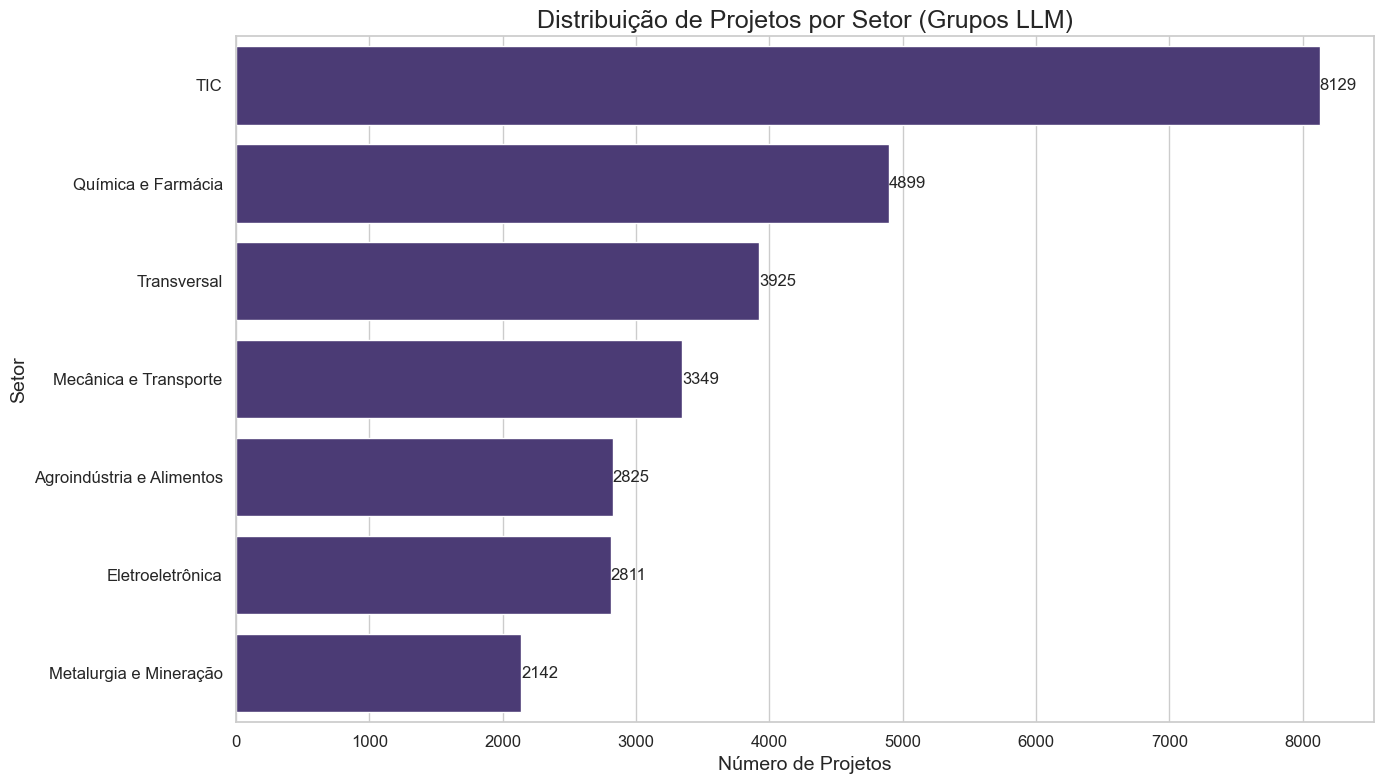

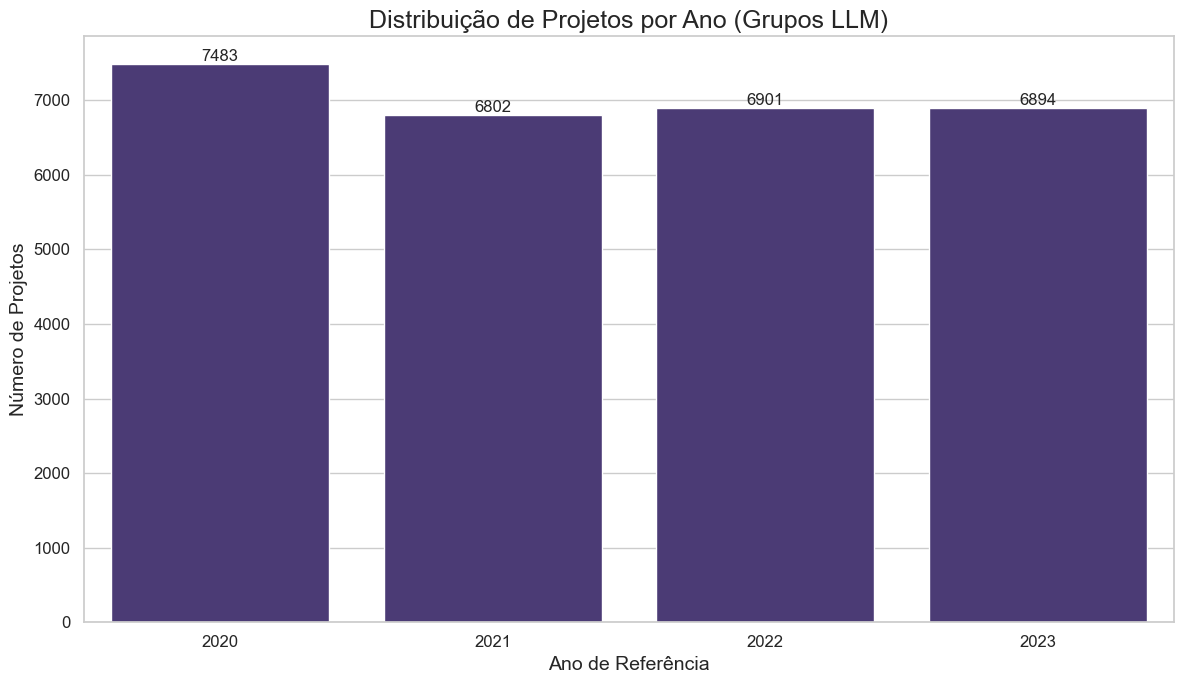

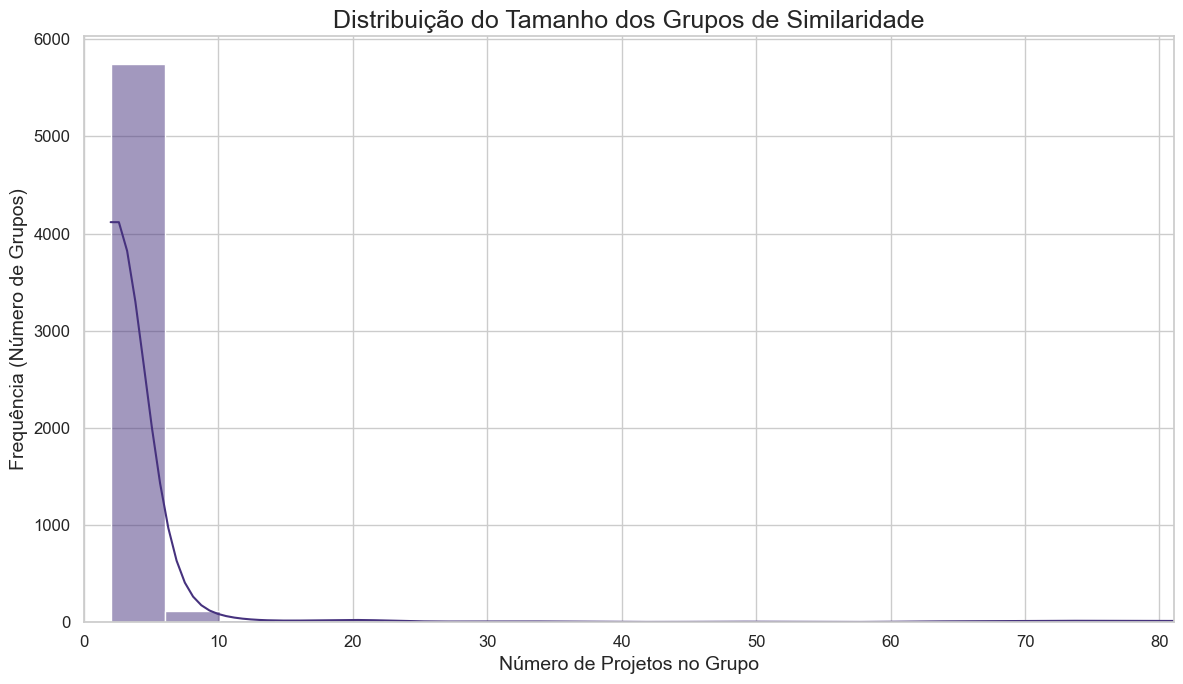

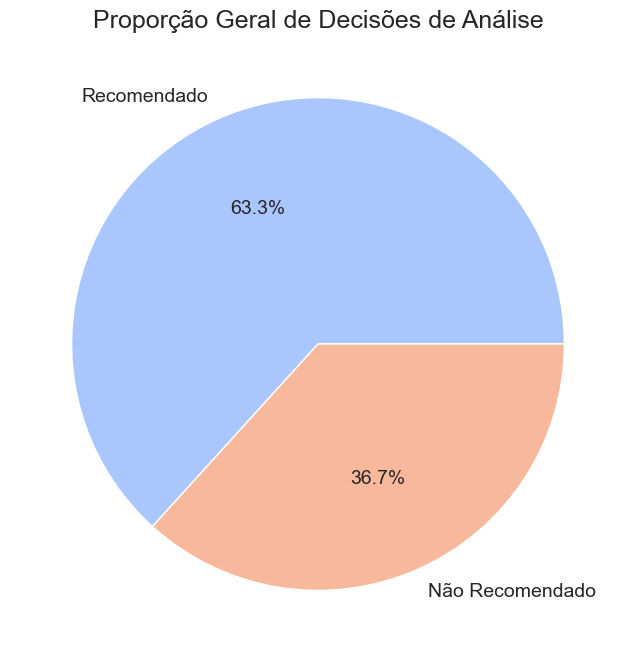

In [2]:
# Gráfico 1: Distribuição de Projetos por Setor
plt.figure(figsize=(14, 8))
sector_order = df['setor'].value_counts().index
ax1 = sns.countplot(y='setor', data=df, order=sector_order)
ax1.set_title('Distribuição de Projetos por Setor (Grupos LLM)')
ax1.set_xlabel('Número de Projetos')
ax1.set_ylabel('Setor')
# Adiciona os valores nas barras
for p in ax1.patches:
    width = p.get_width()
    ax1.text(width + 0.1, p.get_y() + p.get_height() / 2,
             f'{int(width)}', ha='left', va='center')
plt.tight_layout()
plt.show()

# Gráfico 2: Distribuição de Projetos por Ano de Referência
plt.figure(figsize=(12, 7))
year_order = sorted(df['ano_referencia'].dropna().astype(int).unique())
ax2 = sns.countplot(x='ano_referencia', data=df, order=year_order)
ax2.set_title('Distribuição de Projetos por Ano (Grupos LLM)')
ax2.set_xlabel('Ano de Referência')
ax2.set_ylabel('Número de Projetos')
# Adiciona os valores nas barras
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Gráfico 3: Histograma do Tamanho dos Grupos de Similaridade
plt.figure(figsize=(12, 7))
group_sizes = df['grupo_id'].value_counts()
ax3 = sns.histplot(group_sizes, bins=30, kde=True)
ax3.set_title('Distribuição do Tamanho dos Grupos de Similaridade')
ax3.set_xlabel('Número de Projetos no Grupo')
ax3.set_ylabel('Frequência (Número de Grupos)')
# Limitar o eixo x para melhor visualização, excluindo outliers extremos
ax3.set_xlim(0, group_sizes.quantile(0.99))
plt.tight_layout()
plt.show()

# Gráfico 4: Proporção de Decisões de Análise
plt.figure(figsize=(8, 8))
decision_counts = df['do_resultado_analise'].value_counts()
plt.pie(decision_counts, labels=decision_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette("coolwarm", len(decision_counts)),
        wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 14})
plt.title('Proporção Geral de Decisões de Análise')
plt.show()

Taxa de Divergência por Setor (% de grupos com decisões conflitantes):
divergente                 taxa_divergencia
setor                                      
TIC                                   44.57
Agroindústria e Alimentos             44.31
Eletroeletrônica                      43.91
Mecânica e Transporte                 37.18
Transversal                           35.52
Metalurgia e Mineração                34.32
Química e Farmácia                    27.05


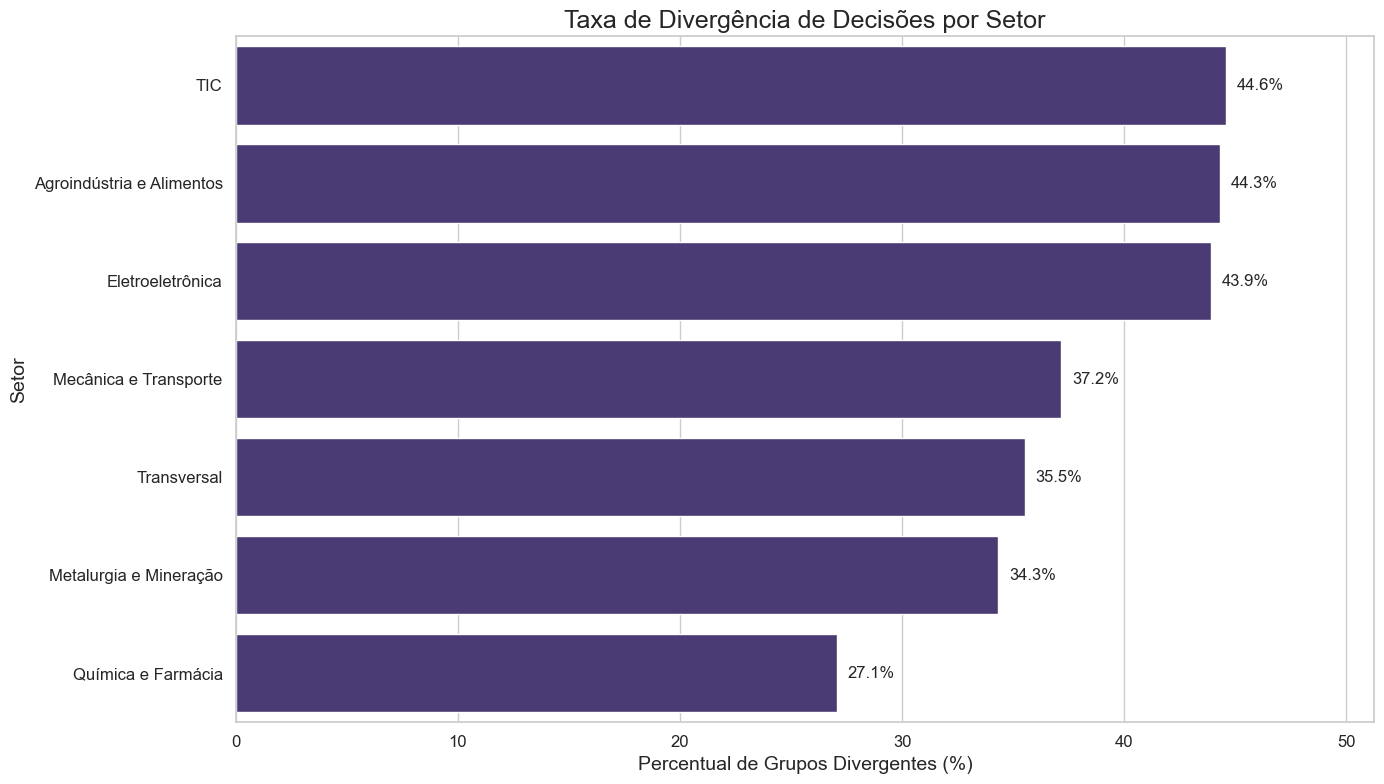

In [3]:
# Calcular a divergência para cada grupo
divergence_data = df.groupby('grupo_id').agg(
    total_projetos=('projeto_id', 'count'),
    decisoes_unicas=('do_resultado_analise', lambda x: x.nunique()),
    setor=('setor', 'first')
).reset_index()

# Identificar grupos divergentes
divergence_data['divergente'] = divergence_data['decisoes_unicas'] > 1

# Calcular a taxa de divergência por setor
sector_divergence = divergence_data.groupby('setor')['divergente'].value_counts(normalize=True).unstack().fillna(0)
if True in sector_divergence.columns:
    sector_divergence['taxa_divergencia'] = sector_divergence[True] * 100
else:
    sector_divergence[True] = 0 # Adiciona a coluna se não existir
    sector_divergence['taxa_divergencia'] = 0


sector_divergence = sector_divergence.sort_values('taxa_divergencia', ascending=False)

print("Taxa de Divergência por Setor (% de grupos com decisões conflitantes):")
print(sector_divergence[['taxa_divergencia']].round(2))

# Gráfico 5: Taxa de Divergência por Setor
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=sector_divergence['taxa_divergencia'], y=sector_divergence.index, orient='h')
ax.set_title('Taxa de Divergência de Decisões por Setor')
ax.set_xlabel('Percentual de Grupos Divergentes (%)')
ax.set_ylabel('Setor')
# Adiciona os valores nas barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5, p.get_y() + p.get_height() / 2,
             f'{width:.1f}%', ha='left', va='center')
ax.set_xlim(0, max(sector_divergence['taxa_divergencia']) * 1.15) # Ajusta limite do eixo x
plt.tight_layout()
plt.show()

Top Avaliadores por Taxa de Consistência (com >= 2 avaliações):
             total_avaliacoes  avaliacoes_consistentes  taxa_consistencia  \
do_id_at                                                                    
124343713.0                18                       18             100.00   
129400658.0                 5                        5             100.00   
301364226.0                 3                        3             100.00   
300830730.0               153                      147              96.08   
127789240.0                49                       47              95.92   
300850231.0               288                      276              95.83   
301643854.0               133                      126              94.74   
300474232.0                36                       34              94.44   
301643692.0               120                      112              93.33   
107608291.0                88                       82              93.18   
101611647.0 

/tmp/ipykernel_1155558/89844228.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=top_15_evaluators['taxa_consistencia'], y=top_15_evaluators.index, palette='crest_r', orient='h')


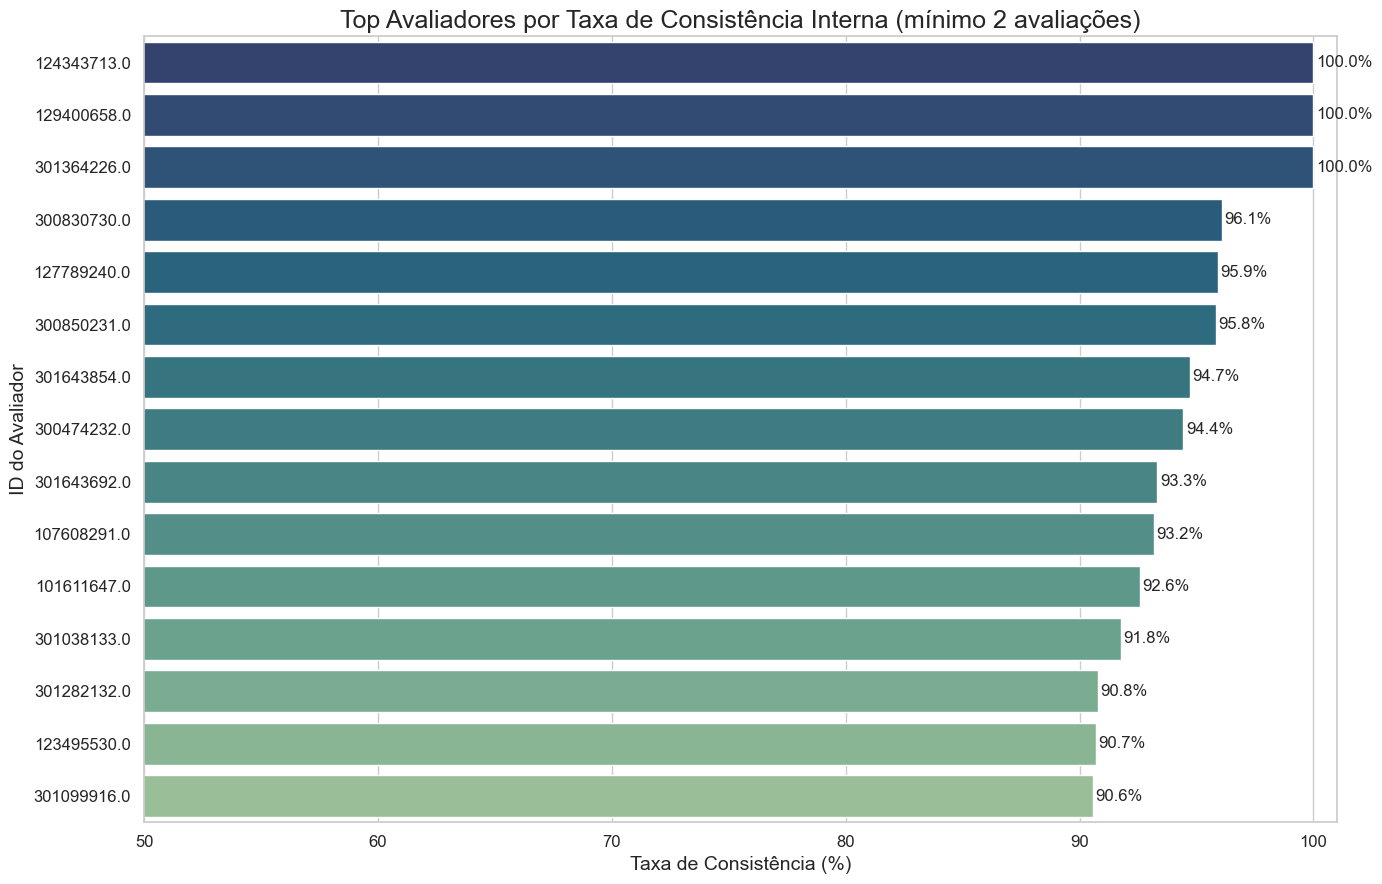

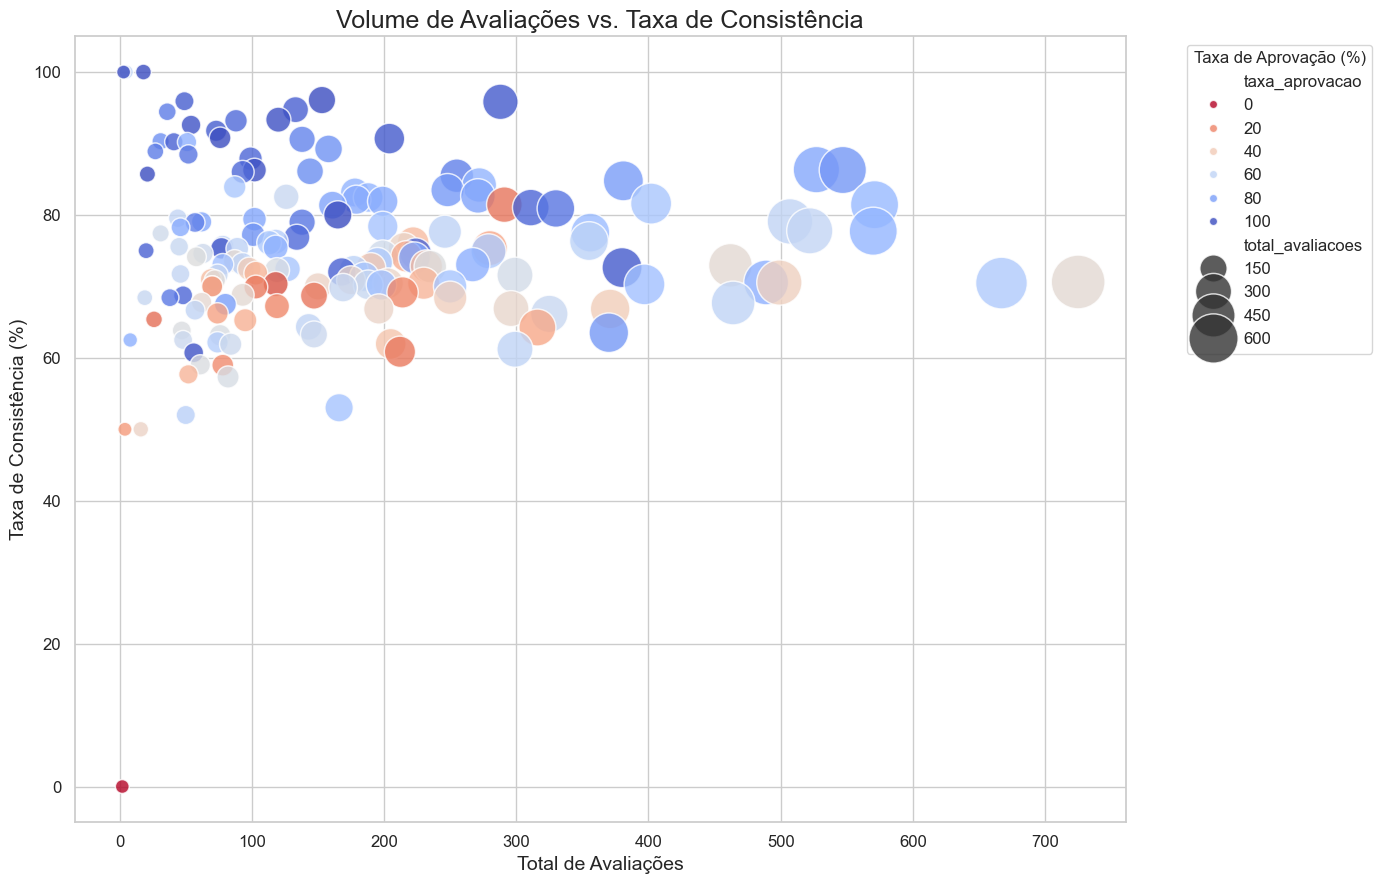

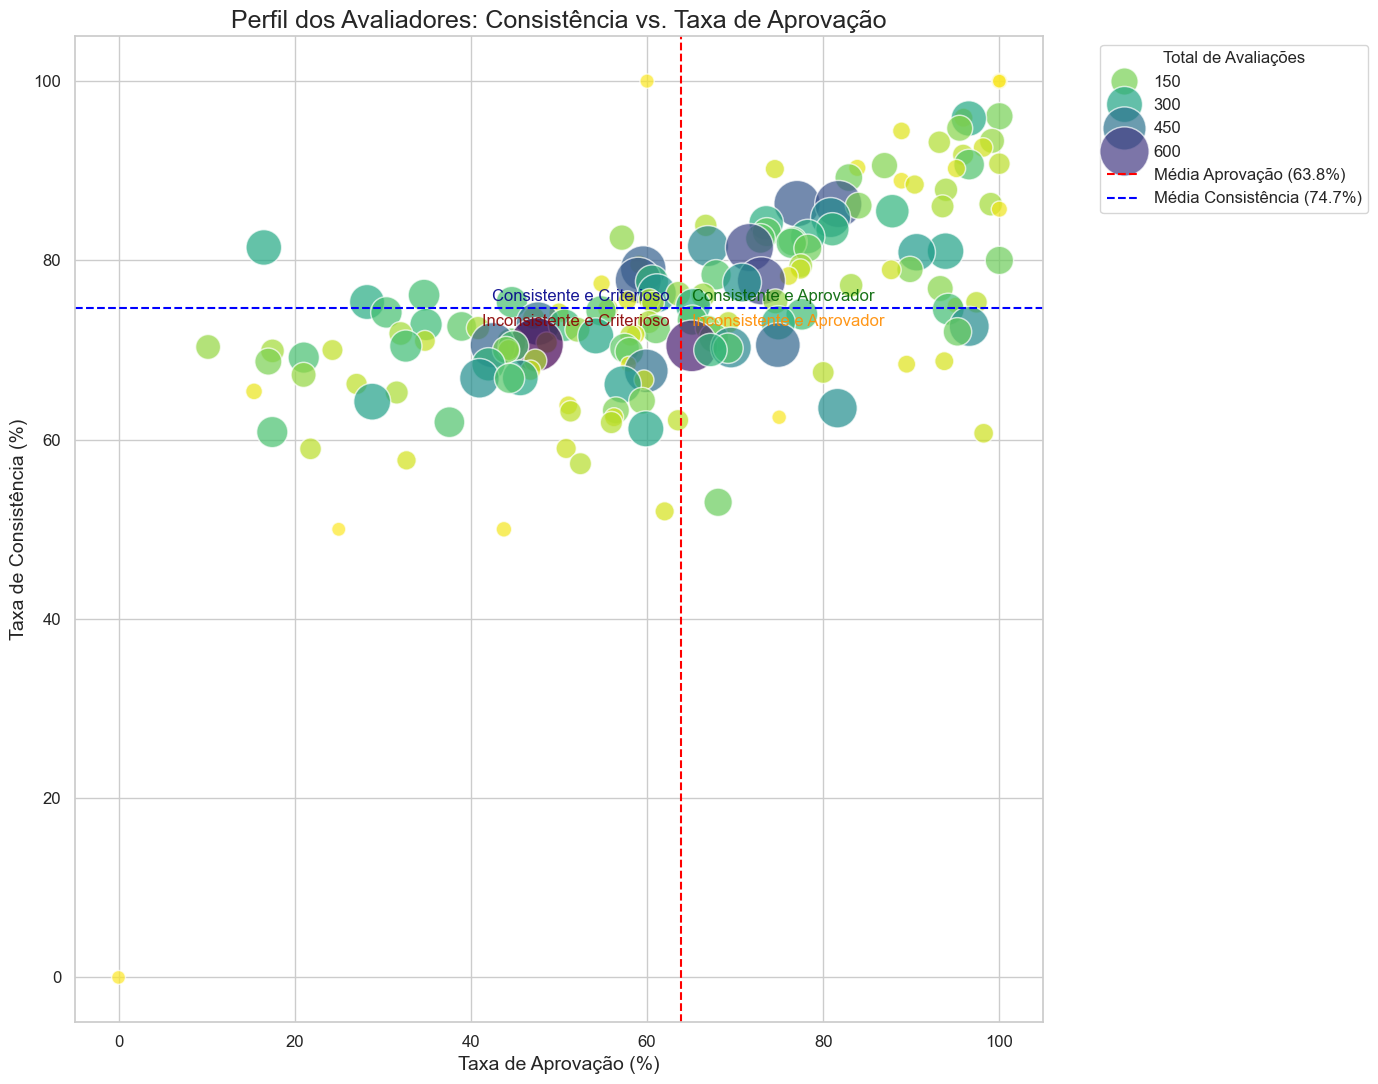

In [4]:
# Determinar a decisão majoritária para cada grupo
majority_decision = df.groupby('grupo_id')['do_resultado_analise'].agg(lambda x: x.mode()[0] if not x.mode().empty else None).rename('decisao_majoritaria')

# Juntar a decisão majoritária de volta ao dataframe principal
df_majority = df.merge(majority_decision, on='grupo_id', how='left')

# Calcular a consistência de cada avaliador
df_majority['consistente'] = df_majority['do_resultado_analise'] == df_majority['decisao_majoritaria']

# Contar avaliações e consistência por avaliador
evaluator_stats = df_majority.groupby('do_id_at').agg(
    total_avaliacoes=('projeto_id', 'count'),
    avaliacoes_consistentes=('consistente', 'sum')
)

# Calcular taxa de consistência
evaluator_stats['taxa_consistencia'] = (evaluator_stats['avaliacoes_consistentes'] / evaluator_stats['total_avaliacoes']) * 100

# Calcular a taxa de aprovação por avaliador
approval_rate = df.groupby('do_id_at')['do_resultado_analise'].apply(lambda x: (x == 'Recomendado').mean() * 100).rename('taxa_aprovacao')
evaluator_stats = evaluator_stats.join(approval_rate)

# Filtrar por avaliadores com um número mínimo de avaliações (ajustado para a amostra, idealmente >= 100)
min_avaliacoes = 2
evaluators_filtered = evaluator_stats[evaluator_stats['total_avaliacoes'] >= min_avaliacoes].sort_values('taxa_consistencia', ascending=False)

print(f"Top Avaliadores por Taxa de Consistência (com >= {min_avaliacoes} avaliações):")
print(evaluators_filtered.head(15).round(2))

# Gráfico 6: Top 15 Avaliadores por Consistência
plt.figure(figsize=(14, 9))
# Usando o df completo para o top 15, mas mostrando apenas os disponíveis na amostra
top_15_evaluators = evaluators_filtered.head(15)
ax1 = sns.barplot(x=top_15_evaluators['taxa_consistencia'], y=top_15_evaluators.index, palette='crest_r', orient='h')
ax1.set_title(f'Top Avaliadores por Taxa de Consistência Interna (mínimo {min_avaliacoes} avaliações)')
ax1.set_xlabel('Taxa de Consistência (%)')
ax1.set_ylabel('ID do Avaliador')
ax1.set_xlim(min(50, top_15_evaluators['taxa_consistencia'].min() - 5), 101)
for p in ax1.patches:
    ax1.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
             f'{p.get_width():.1f}%', ha='left', va='center')
plt.tight_layout()
plt.show()

# Gráfico 7: Dispersão - Volume de Avaliações vs. Consistência
plt.figure(figsize=(14, 9))
ax2 = sns.scatterplot(
    data=evaluators_filtered,
    x='total_avaliacoes',
    y='taxa_consistencia',
    size='total_avaliacoes',
    hue='taxa_aprovacao',
    palette='coolwarm_r',
    sizes=(100, 1500),
    alpha=0.8
)
ax2.set_title('Volume de Avaliações vs. Taxa de Consistência')
ax2.set_xlabel('Total de Avaliações')
ax2.set_ylabel('Taxa de Consistência (%)')
ax2.legend(title='Taxa de Aprovação (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gráfico 8: Quadrantes de Perfil de Avaliador
plt.figure(figsize=(14, 11))
avg_consistency = evaluators_filtered['taxa_consistencia'].mean()
avg_approval = evaluators_filtered['taxa_aprovacao'].mean()
ax3 = sns.scatterplot(
    data=evaluators_filtered,
    x='taxa_aprovacao',
    y='taxa_consistencia',
    size='total_avaliacoes',
    sizes=(100, 1500),
    alpha=0.7,
    hue='total_avaliacoes',
    palette='viridis_r'
)
ax3.axvline(avg_approval, color='red', linestyle='--', lw=1.5, label=f'Média Aprovação ({avg_approval:.1f}%)')
ax3.axhline(avg_consistency, color='blue', linestyle='--', lw=1.5, label=f'Média Consistência ({avg_consistency:.1f}%)')
ax3.set_title('Perfil dos Avaliadores: Consistência vs. Taxa de Aprovação')
ax3.set_xlabel('Taxa de Aprovação (%)')
ax3.set_ylabel('Taxa de Consistência (%)')
# Anotações dos quadrantes
plt.text(avg_approval * 1.02, avg_consistency * 1.01, 'Consistente e Aprovador', fontsize=12, color='darkgreen', alpha=0.9, ha='left')
plt.text(avg_approval * 0.98, avg_consistency * 1.01, 'Consistente e Criterioso', fontsize=12, color='darkblue', alpha=0.9, ha='right')
plt.text(avg_approval * 1.02, avg_consistency * 0.99, 'Inconsistente e Aprovador', fontsize=12, color='darkorange', alpha=0.9, ha='left', va='top')
plt.text(avg_approval * 0.98, avg_consistency * 0.99, 'Inconsistente e Criterioso', fontsize=12, color='darkred', alpha=0.9, ha='right', va='top')
plt.legend(title='Total de Avaliações', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()